In [2]:
%pip install astropy

Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [102]:
data = pd.read_csv('/home/vignesh-nadar/vikky/My Work/finalProject/data/DR18.csv')

In [64]:
print(data.dtypes)

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object


In [65]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237665e+18,214.775024,26.231389,18.91452,17.82512,17.40111,17.12318,16.99686,4649,301,3,203,2.394797e+18,GALAXY,0.015198,2127,53859,27
1,1.237665e+18,190.979819,29.630396,18.93076,17.07127,16.13052,15.68037,15.34830,4649,301,3,61,2.518670e+18,GALAXY,0.103481,2237,53828,117
2,1.237665e+18,222.901700,24.065934,18.96398,18.00796,17.67222,17.42770,17.28470,4649,301,3,254,2.414085e+18,GALAXY,0.039642,2144,53770,567
3,1.237665e+18,211.236033,27.007872,19.07693,18.07678,17.46506,17.30033,16.90555,4649,301,3,181,2.390350e+18,GALAXY,0.157561,2123,53793,235
4,1.237662e+18,219.069523,47.597442,17.68583,16.78106,16.49471,16.39366,16.37046,3918,301,4,154,1.884871e+18,STAR,-0.000300,1674,53464,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237676e+18,70.901389,-6.158416,19.44401,16.87587,15.77122,15.37750,15.16919,7178,301,3,16,3.312459e+18,STAR,0.000161,2942,54521,223
99996,1.237675e+18,177.345861,-1.084221,17.65613,19.66116,18.57861,17.91094,18.93691,6793,301,1,112,3.198381e+17,GALAXY,0.020398,284,51943,300
99997,1.237649e+18,139.006180,-0.524955,17.53905,17.37486,17.52401,17.07631,16.51648,756,301,2,155,5.314509e+17,STAR,0.000204,472,51955,95
99998,1.237649e+18,163.805116,-0.572176,18.63258,17.59472,17.15296,16.96552,16.87494,756,301,2,320,3.107770e+17,STAR,0.000948,276,51909,104


In [103]:
df = data.copy()

In [8]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237665e+18,214.775024,26.231389,18.91452,17.82512,17.40111,17.12318,16.99686,4649,301,3,203,2.394797e+18,GALAXY,0.015198,2127,53859,27
1,1.237665e+18,190.979819,29.630396,18.93076,17.07127,16.13052,15.68037,15.34830,4649,301,3,61,2.518670e+18,GALAXY,0.103481,2237,53828,117
2,1.237665e+18,222.901700,24.065934,18.96398,18.00796,17.67222,17.42770,17.28470,4649,301,3,254,2.414085e+18,GALAXY,0.039642,2144,53770,567
3,1.237665e+18,211.236033,27.007872,19.07693,18.07678,17.46506,17.30033,16.90555,4649,301,3,181,2.390350e+18,GALAXY,0.157561,2123,53793,235
4,1.237662e+18,219.069523,47.597442,17.68583,16.78106,16.49471,16.39366,16.37046,3918,301,4,154,1.884871e+18,STAR,-0.000300,1674,53464,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237676e+18,70.901389,-6.158416,19.44401,16.87587,15.77122,15.37750,15.16919,7178,301,3,16,3.312459e+18,STAR,0.000161,2942,54521,223
99996,1.237675e+18,177.345861,-1.084221,17.65613,19.66116,18.57861,17.91094,18.93691,6793,301,1,112,3.198381e+17,GALAXY,0.020398,284,51943,300
99997,1.237649e+18,139.006180,-0.524955,17.53905,17.37486,17.52401,17.07631,16.51648,756,301,2,155,5.314509e+17,STAR,0.000204,472,51955,95
99998,1.237649e+18,163.805116,-0.572176,18.63258,17.59472,17.15296,16.96552,16.87494,756,301,2,320,3.107770e+17,STAR,0.000948,276,51909,104


In [9]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237663e+18,177.373612,25.093908,18.637564,17.407615,16.882776,16.627404,16.469266,3974.352780,301.0,3.274110,186.301170,2.919558e+18,0.171130,2593.004460,53917.133310,341.859000
std,7.270949e+12,78.078701,20.577267,0.832058,0.986055,1.133157,1.210276,1.281926,1692.899859,0.0,1.620975,140.801444,2.495879e+18,0.438558,2216.771531,1549.002722,217.118311
min,1.237646e+18,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.004268,266.000000,51608.000000,1.000000
25%,1.237658e+18,136.201282,6.760243,18.211350,16.851275,16.195873,15.865040,15.621230,2826.000000,301.0,2.000000,85.000000,1.335398e+18,0.000000,1186.000000,52734.000000,160.000000
50%,1.237662e+18,180.324646,24.050795,18.872410,17.516110,16.891335,16.600505,16.430530,3900.000000,301.0,3.000000,152.000000,2.355424e+18,0.045669,2092.000000,53727.500000,327.000000
75%,1.237667e+18,224.603842,40.420272,19.273370,18.056393,17.586313,17.345850,17.235270,5061.000000,301.0,5.000000,248.000000,3.276507e+18,0.095410,2910.000000,54586.000000,502.000000
max,1.237681e+18,359.999615,84.490494,19.599950,19.974990,31.990100,32.141470,29.383740,8162.000000,301.0,6.000000,982.000000,1.412681e+19,7.011245,12547.000000,58932.000000,1000.000000


In [46]:
df['class'].value_counts()

class
GALAXY    51141
STAR      38227
QSO       10632
Name: count, dtype: int64

In [104]:
df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

In [48]:
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

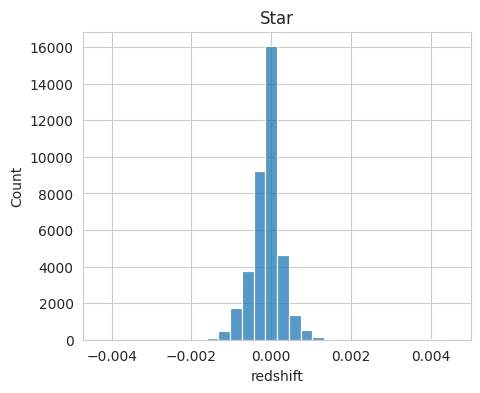

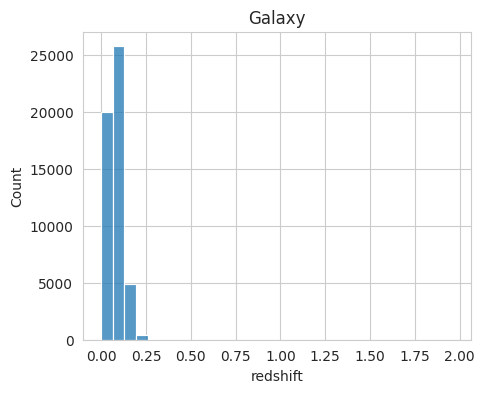

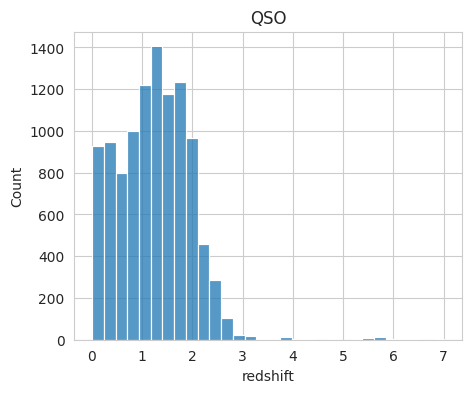

In [49]:
# Create a figure with subplots
plt.figure(figsize=(5, 4))

# Plot the first displot (Star)
sns.histplot(df[df['class']=='STAR'].redshift, bins=30, kde=False)
plt.title('Star')
plt.show()

plt.figure(figsize=(5, 4))
# Plot the second displot (Galaxy)
sns.histplot(df[df['class']=='GALAXY'].redshift, bins=30, kde=False)
plt.title('Galaxy')
plt.show()

plt.figure(figsize=(5, 4))
# Plot the third displot (QSO)
sns.histplot(df[df['class']=='QSO'].redshift, bins=30, kde=False)
plt.title('QSO')
plt.show()

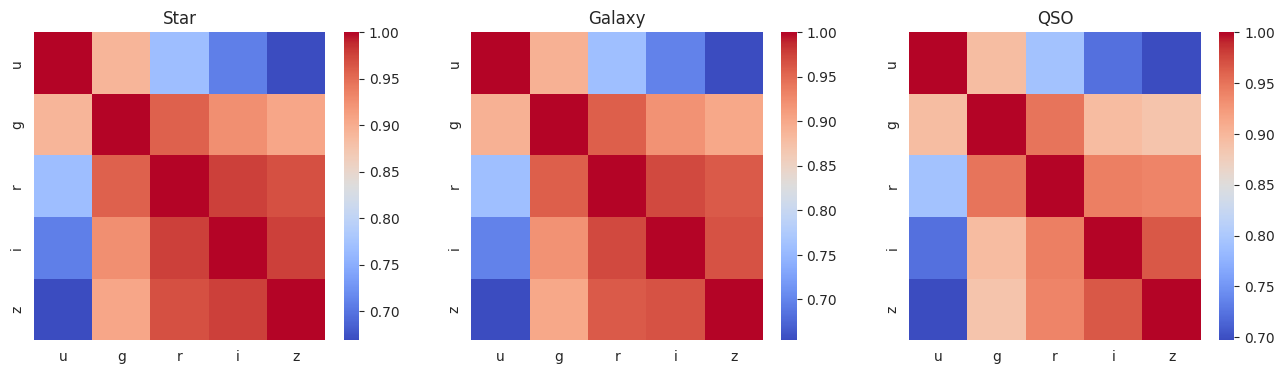

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)

ax = sns.heatmap(df[df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Star')

ax = sns.heatmap(df[df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Galaxy')

ax = sns.heatmap(df[df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('QSO')

In [105]:
galaxy = df[df['class']=='GALAXY']
star = df[df['class']=='STAR']
qso = df[df['class']=='QSO']

In [52]:
from astropy.coordinates import Angle

ra1 = Angle(galaxy['ra'], u.degree)
dec1 = Angle(galaxy['dec'], u.degree)
coords1 = SkyCoord(ra=ra1, dec=dec1, frame='icrs')

ra2 = Angle(star['ra'], u.degree)
dec2 = Angle(star['dec'], u.degree)
coords2 = SkyCoord(ra=ra2, dec=dec2, frame='icrs')

ra3 = Angle(qso['ra'], u.degree)
dec3 = Angle(qso['dec'], u.degree)
coords3 = SkyCoord(ra=ra3, dec=dec3, frame='icrs')

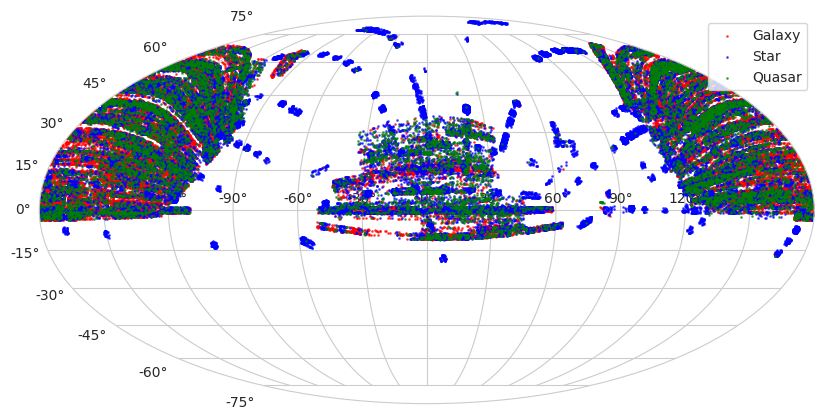

In [53]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords1.ra.wrap_at(180*u.degree).radian, coords1.dec.radian, s=1,c='r',alpha=0.6,label='Galaxy')
ax.scatter(coords2.ra.wrap_at(180*u.degree).radian, coords2.dec.radian,s=1,c='b',alpha=0.6,label='Star')
ax.scatter(coords3.ra.wrap_at(180*u.degree).radian, coords3.dec.radian, s=1,c='g',alpha=0.6,label='Quasar')

#change the marker size manually for the legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
#lgnd.legend_handles[0]._sizes = [30]
#lgnd.legend_handles[1]._sizes = [30]
#lgnd.legend_handles[2]._sizes = [30]
ax.grid(True)
plt.show()

In [82]:
# Count rows with missing values
rows_with_missing_values = df.isnull().any(axis=1).sum()
print("Total rows with missing values:", rows_with_missing_values)

Total rows with missing values: 0


In [114]:
df_fe = df

# encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(df_fe['class'])
df_fe['class'] = y_encoded
df_fe.head(10)

# 0 means galaxy
# 1 means quasar
# 2 means star


,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,214.775024,26.231389,18.91452,17.82512,17.40111,17.12318,16.99686,0,0.015198,2127,53859,27
1,190.979819,29.630396,18.93076,17.07127,16.13052,15.68037,15.34830,0,0.103481,2237,53828,117
2,222.901700,24.065934,18.96398,18.00796,17.67222,17.42770,17.28470,0,0.039642,2144,53770,567
3,211.236033,27.007872,19.07693,18.07678,17.46506,17.30033,16.90555,0,0.157561,2123,53793,235
4,219.069523,47.597442,17.68583,16.78106,16.49471,16.39366,16.37046,2,-0.000300,1674,53464,416
5,221.437519,46.668078,18.85805,17.89683,17.56354,17.43642,17.43742,2,-0.000266,8489,57483,512
6,224.606885,45.417371,19.21197,17.94139,18.10692,18.25467,18.35545,2,-0.000296,1676,53147,461
7,226.225047,44.805855,18.88322,17.75448,17.29257,17.08128,16.98397,2,-0.000491,3390,54945,347
8,227.014705,44.493184,18.16604,17.21939,16.96849,16.85668,16.82426,2,-0.000342,8519,58198,576
9,227.721037,44.084254,17.70671,16.48556,16.03044,15.87200,15.81889,2,-0.000510,3390,54945,149


In [113]:
import pickle

# Principal Component Analysis
pca = PCA(n_components=3)
ugriz = pca.fit_transform(df_fe[['u', 'g', 'r', 'i', 'z']])

# update dataframe
new_df = pd.concat((df_fe, pd.DataFrame(ugriz)), axis=1)
new_df.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
new_df.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
new_df.head()

# Make pickle file of our model
pickle.dump(pca, open("/home/vignesh-nadar/vikky/My Work/finalProject/pca.pkl", "wb"))


In [108]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(new_df.drop('class', axis=1))

# Make pickle file of our model
pickle.dump(scaler, open("/home/vignesh-nadar/vikky/My Work/finalProject/scalar.pkl", "wb"))

In [97]:
scalerMod = MinMaxScaler()
sdssNew = scalerMod.fit_transform(new_df)



In [109]:
X_train, X_test, y_train, y_test = train_test_split(sdss, new_df['class'], test_size=0.33)

In [110]:
import time

In [60]:
%pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [111]:
xgb = XGBClassifier(n_estimators=100)

training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds_test = xgb.predict(X_test)
prediction_end = time.perf_counter()

prediction_start = time.perf_counter()
preds_train = xgb.predict(X_train)
prediction_end = time.perf_counter()

acc_xgb_test = (preds_test == y_test).sum().astype(float) / len(preds_test)*100
acc_xgb_train = (preds_train == y_train).sum().astype(float) / len(preds_train)*100

xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start

print("XGBoost's prediction accuracy for training data is: %3.2f" % (acc_xgb_train))
print("XGBoost's prediction accuracy for testing data is: %3.2f" % (acc_xgb_test))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

# Make pickle file of our model
pickle.dump(xgb, open("/home/vignesh-nadar/vikky/My Work/finalProject/finalModel.pkl", "wb"))

# import scikitplot.estimators as esti
# esti.plot_learning_curve(xgb, X_train, y_train)
# plt.show()

XGBoost's prediction accuracy for training data is: 99.88
XGBoost's prediction accuracy for testing data is: 99.29
Time consumed for training: 3.117
Time consumed for prediction: 0.18224 seconds


In [31]:
rfc = RandomForestClassifier(n_estimators=10)

training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds_test = rfc.predict(X_test)
prediction_end = time.perf_counter()

prediction_start = time.perf_counter()
preds_train = rfc.predict(X_train)
prediction_end = time.perf_counter()

acc_rfc_test = (preds_test == y_test).sum().astype(float) / len(preds_test)*100
acc_rfc_train = (preds_train == y_train).sum().astype(float) / len(preds_train)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start

print("Scikit-Learn's Random Forest Classifier's prediction accuracy for training data is: %3.2f" % (acc_rfc_train))
print("Scikit-Learn's Random Forest Classifier's prediction accuracy testing data is: %3.2f" % (acc_rfc_test))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

import scikitplot.estimators as esti
esti.plot_learning_curve(rfc, X_train, y_train)
plt.show()

Scikit-Learn's Random Forest Classifier's prediction accuracy for training data is: 99.90
Scikit-Learn's Random Forest Classifier's prediction accuracy testing data is: 98.94
Time consumed for training: 4.018 seconds
Time consumed for prediction: 0.07057 seconds


ImportError: cannot import name 'interp' from 'scipy' (/home/vignesh-nadar/vikky/My Work/finalProject/final/lib/python3.12/site-packages/scipy/__init__.py)

In [32]:
results = pd.DataFrame({'Model': ['XGBoost', 'Random Forest'],
    'Score': [acc_xgb_test, acc_rfc_test],
    'Runtime Training': [xgb_train_time, rfc_train_time],
    'Runtime Prediction': [xgb_prediction_time, rfc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,99.051515,2.185626,0.178977
Random Forest,98.939394,4.017652,0.070566


In [33]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99089552 0.98925373 0.99029851 0.99268657 0.99253731 0.98910448
 0.99089552 0.98955224 0.99134328 0.99      ]
Mean: 0.9906567164179105
Standard Deviation: 0.001199985148790564


In [34]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.9919403  0.99029851 0.99104478 0.99164179 0.99492537 0.98970149
 0.99014925 0.98985075 0.99119403 0.99074627]
Mean: 0.9911492537313432
Standard Deviation: 0.0014425201333226544


In [35]:
importances = pd.DataFrame({
    'Feature': new_df.drop('class', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
redshift,0.950373
PCA_3,0.014659
PCA_2,0.008279
PCA_1,0.005845
mjd,0.004673
plate,0.004598
fiberid,0.004044
ra,0.003915
dec,0.003614


<Axes: xlabel='Feature'>

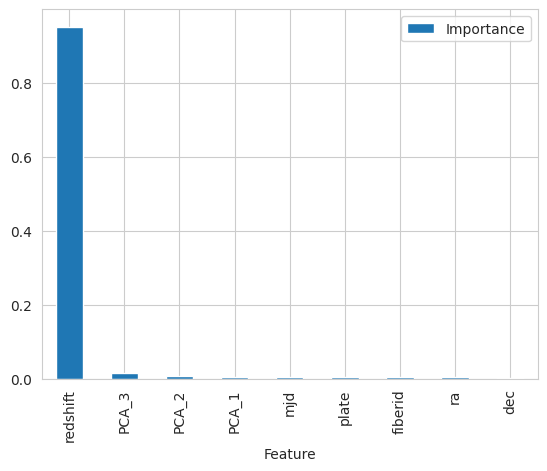

In [36]:
importances.plot.bar()

In [37]:
scaler = MinMaxScaler()
sdss = pd.DataFrame(scaler.fit_transform(new_df.drop(['mjd', 'class'], axis=1)), columns=new_df.drop(['mjd', 'class'], axis=1).columns)
sdss['class'] = new_df['class']

In [38]:
sdss.head(10)

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
0,0.596583,0.439741,0.002775,0.151535,0.026026,0.552827,0.774935,0.566335,0
1,0.530483,0.472428,0.015359,0.160492,0.116116,0.472991,0.850009,0.566814,0
2,0.619158,0.418916,0.006259,0.152919,0.566567,0.569444,0.766148,0.564769,0
3,0.586752,0.447208,0.023067,0.151209,0.234234,0.559664,0.794555,0.559455,0
4,0.608513,0.645211,0.000566,0.114649,0.415415,0.493402,0.689073,0.567510,2
5,0.615091,0.636274,0.000570,0.669571,0.511512,0.568215,0.748978,0.572069,2
6,0.623895,0.624246,0.000566,0.114811,0.460460,0.608521,0.724013,0.587200,2
7,0.628390,0.618365,0.000538,0.254377,0.346346,0.549124,0.772067,0.569367,2
8,0.630584,0.615359,0.000560,0.672014,0.575576,0.525213,0.711492,0.568989,2
9,0.632546,0.611426,0.000536,0.254377,0.148148,0.465037,0.715057,0.569851,2


In [39]:
X_train, X_test, y_train, y_test = train_test_split(sdss.drop('class', axis=1), sdss['class'], test_size=0.33)

In [40]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0,min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 98.94


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Classifier
rfc = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train RFC with best parameters
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)

# Evaluate RFC on test data
preds = best_rfc.predict(X_test)
accuracy = (preds == y_test).sum().astype(float) / len(preds) * 100
print("RFC's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))


RFC's prediction accuracy WITH optimal hyperparameters is: 99.02
